<a href="https://colab.research.google.com/github/seupedro7/Trainee-CIS/blob/main/Pedro_Oliveira_Trainee_CIS_1_semana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto 1 - Trainee - Tratamento dos dados**

Para as análises do projeto trainees da primeira semana, iremos utilizar dois datasets que trazem os dados do Campeonato Brasileiro desde que o mesmo é disputados em pontos corridos(edição de 2003).
O primeiro dataset conta com os dados dos periodos aos quais foram realizadas as edições do brasileirao em pontos corridos até o ano de 2020.
E o segundo possui os dados dos jogos dessas edições do brasileirão incluindo placares, estádios, horarios e outros.

In [ ]:
import seaborn as sns 
import statistics as stat
import string as st
import pandas as pd 
import numpy as np  
import matplotlib as mat
import matplotlib.pyplot as plt

import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


De inicio, iremos importar e juntar os dataframes em um só para facilitar o trabalho

In [ ]:

urlfile2="https://github.com/juvenalfonseca/python/raw/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv"
urlfile1="https://github.com/juvenalfonseca/python/raw/master/datasets/campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv"
df_jogos=pd.read_csv(urlfile2, delimiter=";")
df_periodo=pd.read_csv(urlfile1, delimiter=";")
#padronizamos os dataframes em lower case
df_jogos.columns   = df_jogos.columns.str.lower()
df_periodo.columns = df_periodo.columns.str.lower()
### alteramos os campos de datas de char para date
df_periodo['inicio'] = pd.to_datetime(df_periodo['inicio'], format="%d/%m/%Y")
df_periodo['fim'] = pd.to_datetime(df_periodo['fim'], format="%d/%m/%Y")
df_jogos['data'] = pd.to_datetime(df_jogos['data'], format="%d/%m/%Y")
df.rename(columns={'data': 'date'})
### captalizamos as strings
df_jogos['dia'] = df_jogos['dia'].str.title()
df_jogos['mandante'] = df_jogos['mandante' ].str.title()
df_jogos['visitante'] = df_jogos['visitante'].str.title()
df_jogos['vencedor'] = df_jogos['vencedor' ].str.title()
df_jogos['arena'] = df_jogos['arena'    ].apply(lambda x: x.title())






In [ ]:
### juntamos os datasets, de forma que ambos fosse relacionados por um atributo novo('new') e filtramos para mantes apenas as datas dentro do periodo de realização de cada torneio
df_periodo["new"] = 1
df_jogos["new"] = 1
 
df = pd.merge(df_periodo, df_jogos, on ='new').drop("new", 1)
df = df.query('data >= inicio & data <= fim')
df.head(5)

,torneio,inicio,fim,rodada,data,horário,dia,mandante,visitante,vencedor,arena,mandante placar,visitante placar,estado mandante,estado visitante,estado vencedor
0,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Athlético-Pr,Grêmio,Athlético-Pr,Arena Da Baixada,2,0,PR,RS,PR
1,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Guarani,Vasco,Guarani,Brinco De Ouro,4,2,SP,RJ,SP
2,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-
3,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-
4,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,ES,SC,-


###Análise dos Gols


Primeiro iremos realizar uma análise dos gols no campeonato brasileiro, aqui poderemos extrair dos dados, os gols em cada edição do campeonato de pontos corridos. Além do total e da porcentagem de gols de mandantes e de visitantes no decorrer do torneio.

In [ ]:
### gols por edição
gols_mandante = df[['torneio', 'mandante placar']].groupby('torneio').agg(lambda x: sum(x)).reset_index()
gols_mandante.rename(columns = {"mandante placar": "gols_mandante"}, inplace=True)
 
gols_visitante = df.groupby('torneio')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)
 
gols_edicao = pd.merge(gols_mandante, gols_visitante, on="torneio")
gols_edicao['gols_total'] = gols_edicao['gols_mandante'] + gols_edicao['gols_visitante']
gols_edicao['gols_mandante_perc'  ] = (gols_edicao['gols_mandante' ]/gols_edicao['gols_total'])*100
gols_edicao['gols_visitantes_perc'] = (gols_edicao['gols_visitante']/gols_edicao['gols_total'])*100
 
gols_edicao

,torneio,gols_mandante,gols_visitante,gols_total,gols_mandante_perc,gols_visitantes_perc
0,BRA2003,982,610,1592,61.683417,38.316583
1,BRA2004,947,587,1534,61.734029,38.265971
2,BRA2005,835,616,1451,57.546520,42.453480
3,BRA2006,604,426,1030,58.640777,41.359223
4,BRA2007,638,414,1052,60.646388,39.353612
5,BRA2008,654,376,1030,63.495146,36.504854
6,BRA2009,659,435,1094,60.237660,39.762340
7,BRA2010,581,397,978,59.406953,40.593047
8,BRA2011,610,407,1017,59.980334,40.019666
9,BRA2012,559,380,939,59.531416,40.468584


In [ ]:
### gols por edição comparativo
df1 = gols_edicao[['torneio','gols_mandante' ]]
df2 = gols_edicao[['torneio','gols_visitante']]
df3 = gols_edicao[['torneio','gols_total'    ]]
 
df1.rename(columns = {'gols_mandante' : 'gols' }, inplace=True)
df2.rename(columns = {'gols_visitante': 'gols' }, inplace=True)
df3.rename(columns = {'gols_total'    : 'gols' }, inplace=True)
 
df1['tipo_gols'] = 'gols_mandante'
df2['tipo_gols'] = 'gols_visitante'
df3['tipo_gols'] = 'gols_total'
 
df4 = pd.concat([df1, df2, df3]).reset_index(drop=True)

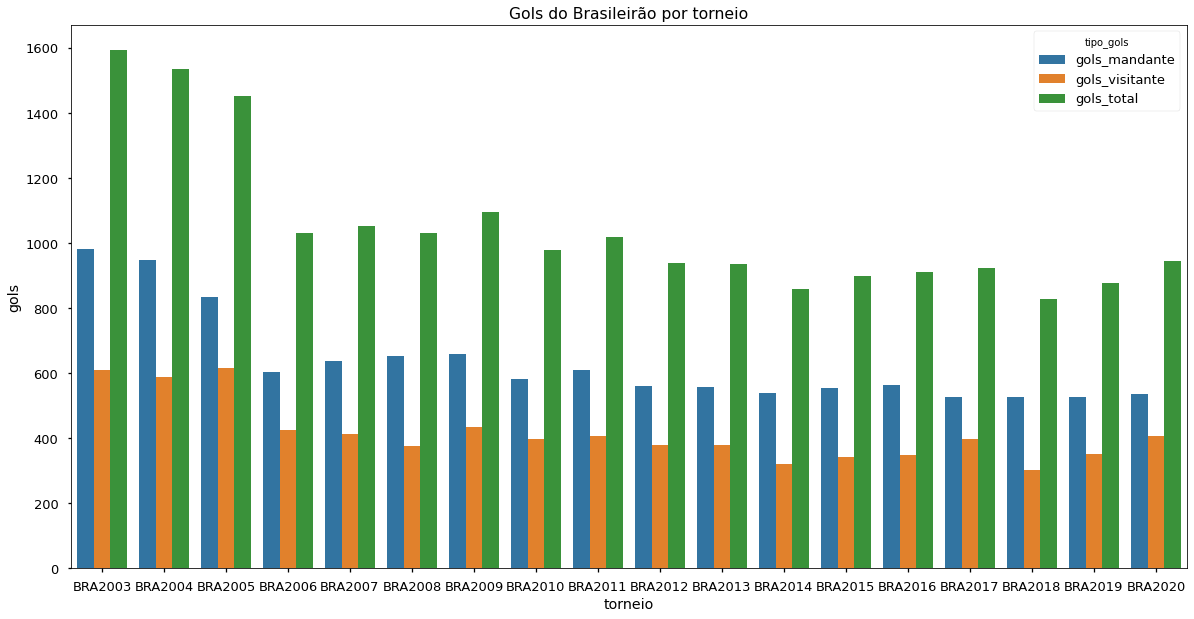

In [ ]:
### gráfico gols por edição comparativo
sns.barplot(x="torneio", y="gols", hue="tipo_gols", data=df4)
plt.title('Gols do Brasileirão por torneio')
plt.rcParams['figure.figsize']=(20,10)


Uma informação interessante que esse grafíco passa é que o numero de gols totais por edição do brasileirao é sempre proximo de 1000, menos nas 3 primeiras edições do torneio, estas que contavam com 24 times na primeira divisão, enquanto as edições posteriores contam com apenas 20 times.

##Gols por time


In [ ]:
gols_mandante_time  = df.groupby('mandante' )['mandante placar' ].sum().sort_values(ascending=False).reset_index()
gols_mandante_time.rename(columns  = {"mandante" : "time", 'mandante placar' : 'gols marcados' }, inplace=True)
 
gols_visitante_time = df.groupby('visitante')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante_time.rename(columns = {"visitante": "time", 'visitante placar': 'gols marcados' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])
 
gols_marcados_time = gols_time.groupby('time')['gols marcados'].sum().sort_values(ascending=False).reset_index()
gols_marcados_time.head(20)

,time,gols marcados
0,Santos,1060
1,São Paulo,1037
2,Flamengo,984
3,Cruzeiro,978
4,Atlético-Mg,967
5,Fluminense,946
6,Grêmio,912
7,Internacional,893
8,Athlético-Pr,892
9,Palmeiras,889


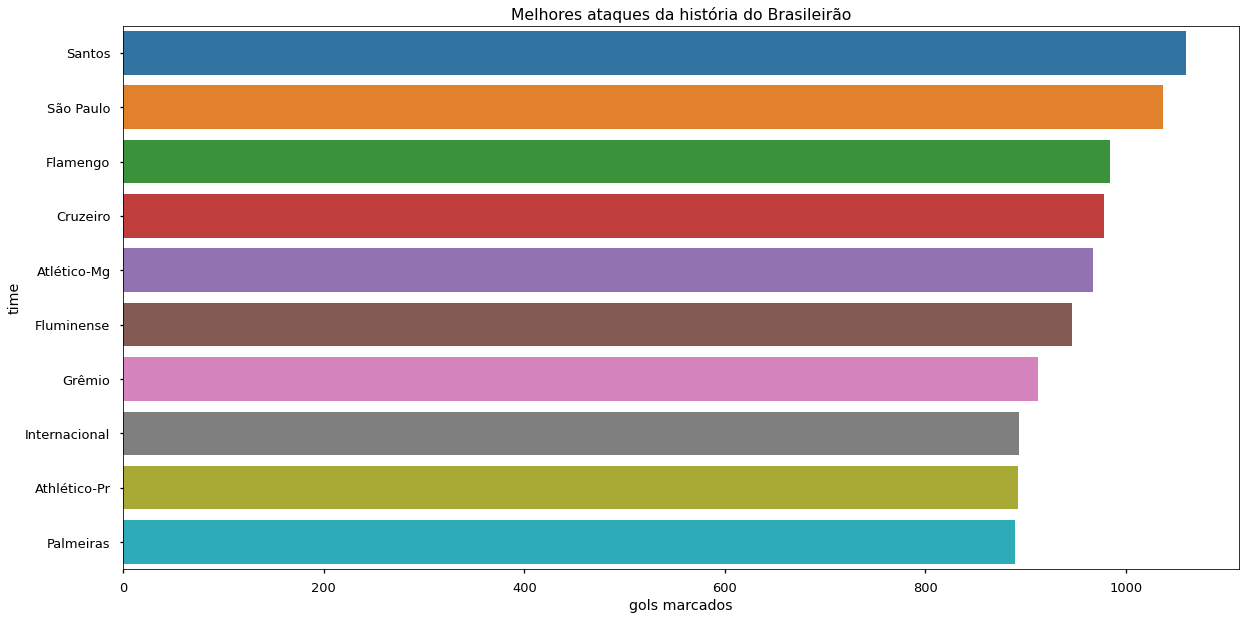

In [ ]:
sns.barplot(x="gols marcados", y="time", data=gols_marcados_time.head(10))
plt.title('Melhores ataques da história do Brasileirão')
plt.show()

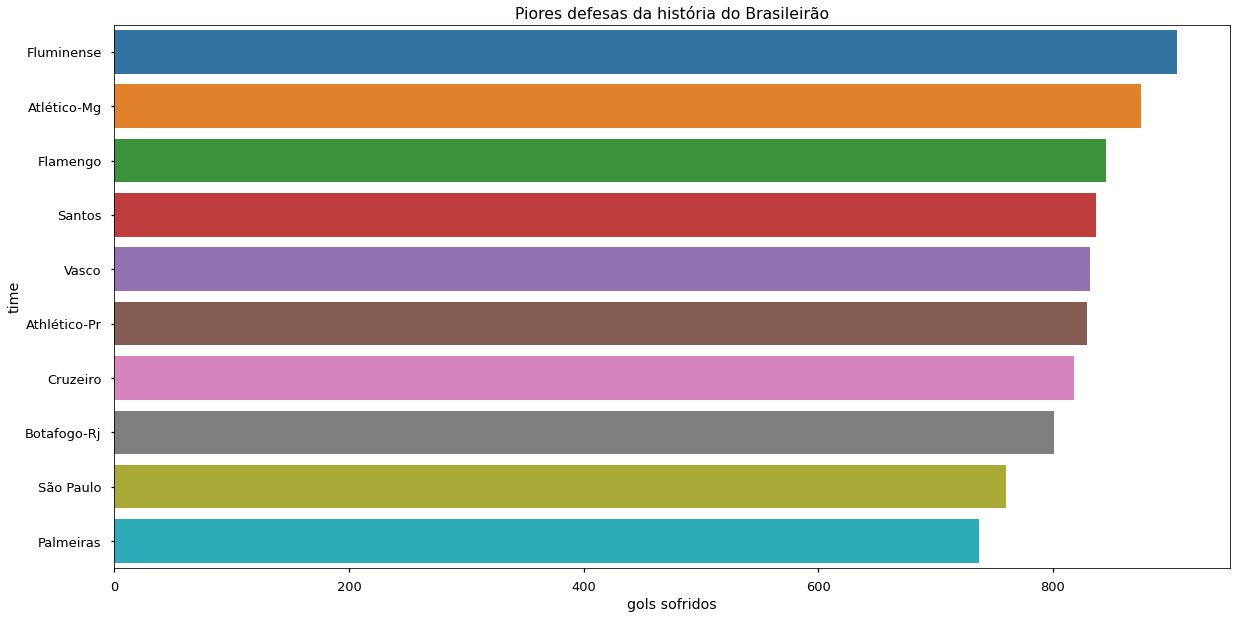

In [ ]:
gols_mandante_time  = df.groupby('visitante')['mandante placar' ].sum().sort_values(ascending=False).reset_index()
gols_mandante_time.rename(columns  = {"visitante": "time", 'mandante placar' : 'gols sofridos' }, inplace=True)
 
gols_visitante_time = df.groupby('mandante' )['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante_time.rename(columns = {"mandante" : "time", 'visitante placar': 'gols sofridos' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])
 
gols_sofridos_time = gols_time.groupby('time')['gols sofridos'].sum().sort_values(ascending=False).reset_index()


sns.barplot(x="gols sofridos", y="time", data=gols_sofridos_time.head(10))
plt.title('Piores defesas da história do Brasileirão')
plt.show()

,time,gols sofridos
0,Bragantino,21
1,Joinville,31
2,Csa,34
3,Santo André,36
4,Barueri,38
...,...,...
39,Vasco,344
40,Botafogo-Rj,345
41,Cruzeiro,356
42,Atlético-Mg,361


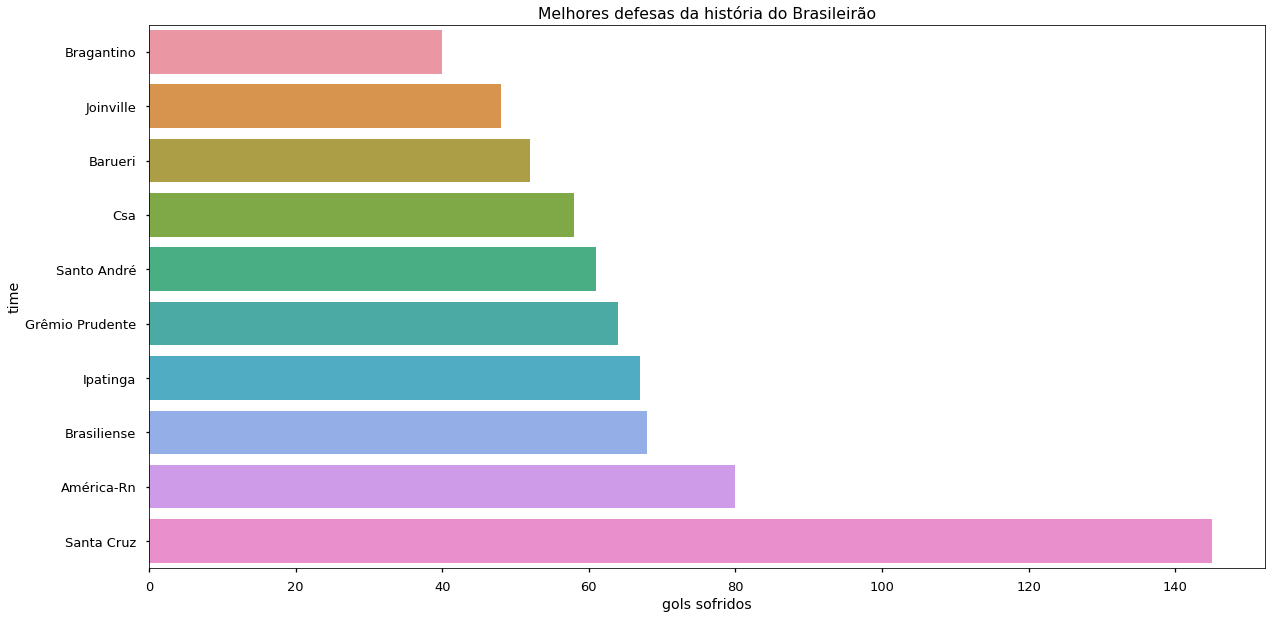

In [186]:
#melhores defesas
gols_mandante_time  = df.groupby('visitante')['mandante placar' ].sum().sort_values(ascending=True).reset_index()
gols_mandante_time.rename(columns  = {"visitante": "time", 'mandante placar' : 'gols sofridos' }, inplace=True)
 
gols_visitante_time = df.groupby('mandante' )['visitante placar'].sum().sort_values(ascending=True).reset_index()
gols_visitante_time.rename(columns = {"mandante" : "time", 'visitante placar': 'gols sofridos' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])
display(gols_time)
gols_sofridos_time = gols_time.groupby('time')['gols sofridos'].sum().sort_values(ascending=True).reset_index()
sns.barplot(x="gols sofridos", y="time", data=gols_sofridos_time.head(10))
plt.title('Melhores defesas da história do Brasileirão')
plt.show()

Este ultimo gráfico mostra um problema, a maioria dos times não disputam todas as edições, devido ao rebaixamento de times. Por isso, a ánalise de melhores defesas não é válida dessa forma, pois os times que menos sofreram gols na verdade são os times que menos participaram da Seria A do brasileirão.
Sendo assim, uma análise que poderia ser feita é a média de gols de cada time (isso vale para Gols Marcados e Sofridos) ao invés da soma total de gols em todas as edições.

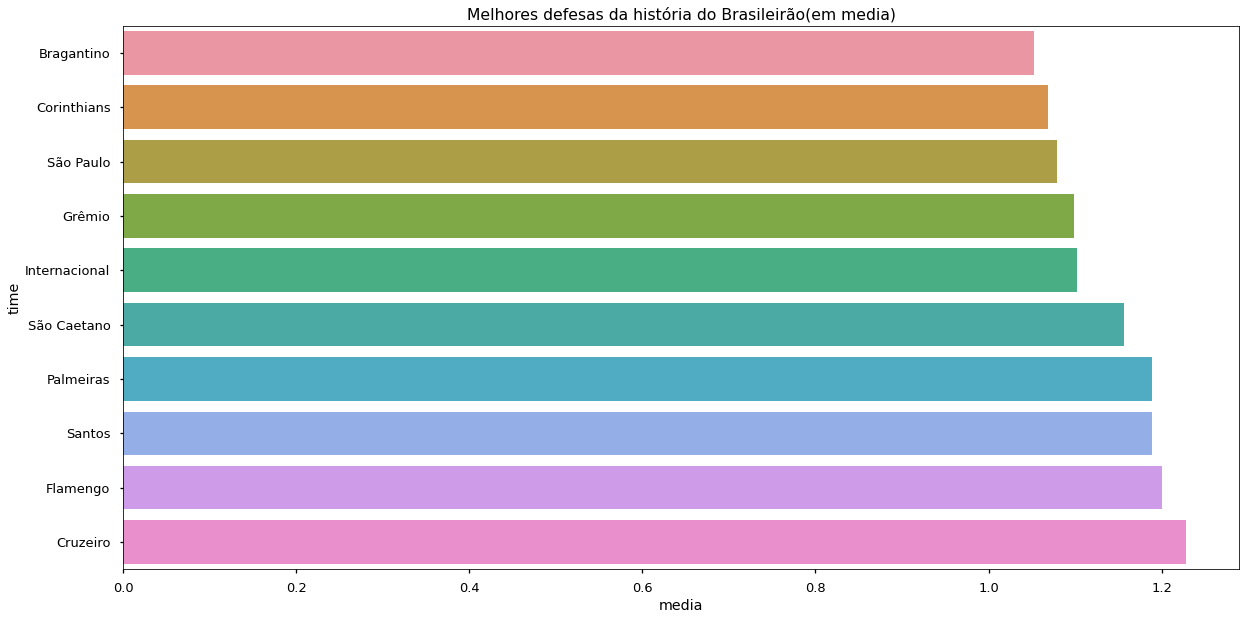

In [191]:

jogosm= df.mandante.value_counts()
jogosv = df.visitante.value_counts()
jogos = (jogosm+jogosv).to_frame().reset_index()
jogos = jogos.rename(columns= {0: 'list'})
jogos.index.name = 'index'

jogos.columns= ["time","jogos"]

gols_mandante_time  = df.groupby('visitante')['mandante placar' ].sum().sort_values(ascending=True).reset_index()
gols_mandante_time.rename(columns  = {"visitante": "time", 'mandante placar' : 'gols sofridos' }, inplace=True)
 
gols_visitante_time = df.groupby('mandante' )['visitante placar'].sum().sort_values(ascending=True).reset_index()
gols_visitante_time.rename(columns = {"mandante" : "time", 'visitante placar': 'gols sofridos' }, inplace=True)
 
gols_time = pd.concat([gols_mandante_time, gols_visitante_time])

gols_time= gols_time.merge(jogos)
gols_time['media']=gols_time['gols sofridos'] / gols_time['jogos']

gols_sofridos_time = gols_time.groupby('time')['media'].sum().sort_values(ascending=True).reset_index()


sns.barplot(x="media", y="time", data=gols_sofridos_time.head(10))
plt.title('Melhores defesas da história do Brasileirão(em media)')
plt.show()



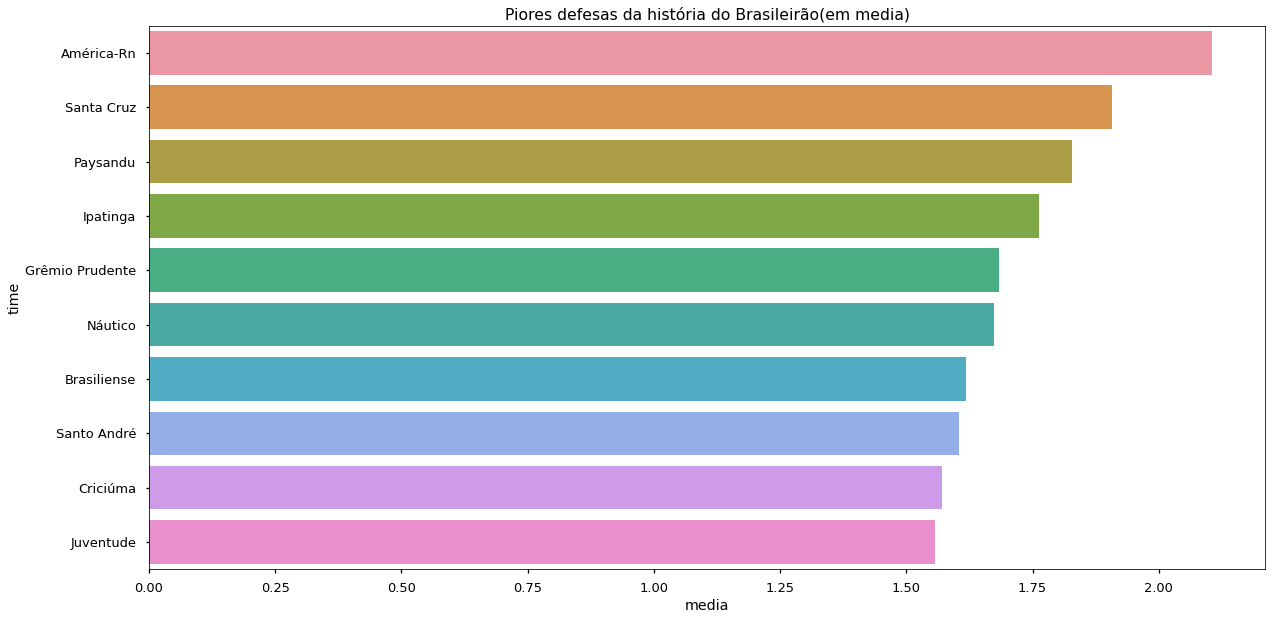

In [202]:
gols_sofridos_time = gols_time.groupby('time')['media'].sum().sort_values(ascending=False).reset_index()


sns.barplot(x="media", y="time", data=gols_sofridos_time.head(10))
plt.title('Piores defesas da história do Brasileirão(em media)')
plt.show()


In [ ]:
### melhores ataques por edição
df['clube']                  = df['mandante']
gols_clubes_mandantes        = df.groupby(['torneio','clube'])['mandante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_mandantes.rename(columns  = {"mandante placar" : "gols_mandante" }, inplace=True)
 
df['clube']                  = df['visitante']
gols_clubes_visitantes       = df.groupby(['torneio','clube'])['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_visitantes.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)
 
gols_clubes               = pd.merge(gols_clubes_mandantes, gols_clubes_visitantes,  on=["torneio","clube"])
gols_clubes['gols_total'] = gols_clubes['gols_mandante'] + gols_clubes['gols_visitante']
 
ataque_pior   = gols_clubes.groupby('torneio')['gols_total'].min().sort_values(ascending=False).reset_index()
ataque_melhor = gols_clubes.groupby('torneio')['gols_total'].max().sort_values(ascending=False).reset_index()
 
gols_torneio_ataque_melhor = pd.merge(gols_clubes, ataque_melhor, on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_melhor.rename(columns = {"gols_total": "ataque_melhor"}, inplace=True)
 
gols_torneio_ataque_pior   = pd.merge(gols_clubes, ataque_pior  , on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_pior.rename(columns   = {"gols_total": "ataque_pior"  }, inplace=True)
 
gols_ataques = pd.merge(gols_torneio_ataque_melhor, gols_torneio_ataque_pior, on="torneio", suffixes=("_melhor","_pior"))
gols_ataques.sort_values(['torneio','clube_melhor','clube_pior'])

,torneio,clube_melhor,ataque_melhor,clube_pior,ataque_pior
2,BRA2003,Cruzeiro,102,Vitória,50
1,BRA2004,Santos,103,Guarani,43
0,BRA2004,Santos,103,Ponte Preta,43
5,BRA2005,Corinthians,87,Brasiliense,49
16,BRA2006,São Paulo,66,São Caetano,37
7,BRA2007,Cruzeiro,74,América-Rn,24
13,BRA2008,Flamengo,67,Ipatinga,37
4,BRA2009,Grêmio,67,Athlético-Pr,42
15,BRA2010,Grêmio,68,Guarani,33
17,BRA2011,Fluminense,60,Athlético-Pr,38


###Análise de pontos

In [176]:
pontos_participantes               = df.groupby('torneio')['mandante'].nunique().sort_values(ascending=False).reset_index()
pontos_participantes['pontos_max'] = (pontos_participantes.mandante - 1)*2*3
 
pontos = df[['torneio', 'mandante', 'visitante', 'mandante placar', 'visitante placar']]
pontos['pontos_mandante' ] = pontos.apply(lambda x: 3 if x['mandante placar'] > x['visitante placar'] else (0 if x['mandante placar'] < x['visitante placar'] else 1), axis=1)
pontos['pontos_visitante'] = pontos.apply(lambda x: 3 if x['mandante placar'] < x['visitante placar'] else (0 if x['mandante placar'] > x['visitante placar'] else 1), axis=1)
 
pontos_mandantes = pontos.groupby(['torneio','mandante' ])['pontos_mandante' ].sum().sort_values(ascending=False).reset_index()
pontos_mandantes.rename(columns = {"mandante": "clube" }, inplace=True)

pontos_visitante = pontos.groupby(['torneio','visitante'])['pontos_visitante'].sum().sort_values(ascending=False).reset_index()
pontos_visitante.rename(columns = {"visitante": "clube"}, inplace=True)

pontos_total = pd.merge(pontos_mandantes, pontos_visitante, on=['torneio','clube'])
pontos_total['pontos_total'] = pontos_total.pontos_mandante + pontos_total.pontos_visitante
pontos_total=pontos_total.sort_values(by=['pontos_total'],ascending=False)




In [177]:
#maiores pontuadores de uma edição do brasileirao
pontos_total.head(10)



,torneio,clube,pontos_mandante,pontos_visitante,pontos_total
2,BRA2003,Cruzeiro,56,44,100
3,BRA2019,Flamengo,53,37,90
1,BRA2004,Santos,56,33,89
6,BRA2003,Santos,51,36,87
4,BRA2004,Athlético-Pr,53,33,86
0,BRA2004,São Paulo,56,26,82
63,BRA2005,Corinthians,42,39,81
9,BRA2015,Corinthians,50,31,81
17,BRA2014,Cruzeiro,47,33,80
7,BRA2018,Palmeiras,50,30,80


In [178]:
#menores pontuadores de uma edição do brasileirao
pontos_total=pontos_total.sort_values(by=['pontos_total'],ascending=True)
pontos_total.head(10)

,torneio,clube,pontos_mandante,pontos_visitante,pontos_total
369,BRA2007,América-Rn,9,8,17
368,BRA2013,Náutico,12,8,20
367,BRA2019,Avaí,12,8,20
359,BRA2018,Paraná,19,4,23
366,BRA2020,Botafogo-Rj,14,13,27
338,BRA2016,América-Mg,24,4,28
350,BRA2006,Santa Cruz,22,6,28
362,BRA2012,Atlético-Go,18,12,30
354,BRA2012,Figueirense,21,9,30
340,BRA2009,Sport,24,7,31


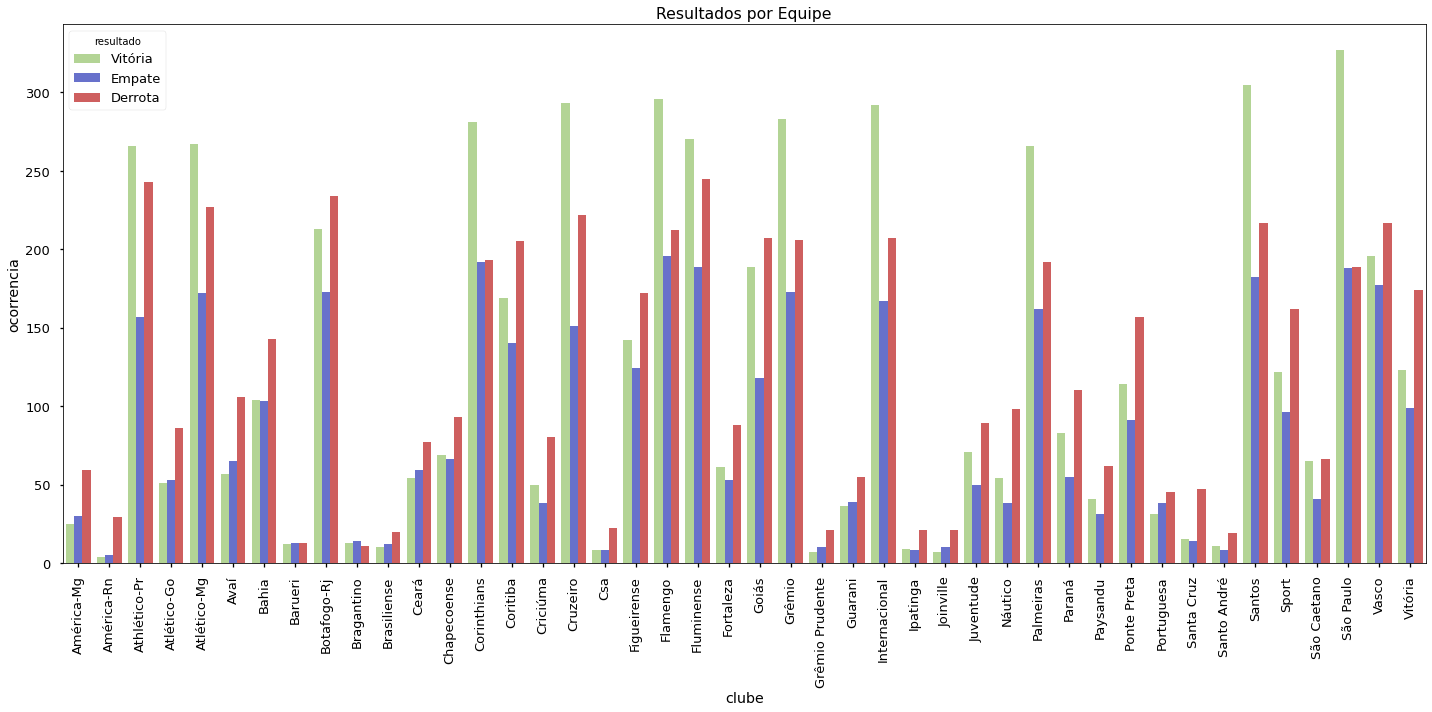

In [165]:
resultado = pontos[['torneio','mandante','visitante','pontos_mandante','pontos_visitante']]
resultado['resultado_mandante' ] = pontos.apply(lambda x: 'Vitória' if x['pontos_mandante' ] == 3 else ('Derrota' if x['pontos_mandante' ] == 0 else 'Empate'), axis=1)
resultado['resultado_visitante'] = pontos.apply(lambda x: 'Vitória' if x['pontos_visitante'] == 3 else ('Derrota' if x['pontos_visitante'] == 0 else 'Empate'), axis=1)
 
resultado_mandante = resultado.groupby( ['mandante' ,'resultado_mandante' ])['torneio'].count().reset_index()
resultado_mandante.rename(columns  = {"mandante": "clube" , "resultado_mandante" :"resultado", "torneio":"ocorrencia"}, inplace=True)
 
resultado_visitante = resultado.groupby(['visitante','resultado_visitante'])['torneio'].count().reset_index()
resultado_visitante.rename(columns = {"visitante": "clube", "resultado_visitante":"resultado", "torneio":"ocorrencia"}, inplace=True)
 
resultado = pd.concat([resultado_mandante, resultado_visitante])
resultado = resultado.groupby(['clube','resultado'])['ocorrencia'].sum().reset_index()

colors = ["#b2df8a", "#5764db","#e14c4c"]
sns.set_palette(sns.color_palette(colors))
 
g = sns.barplot(x="clube", y="ocorrencia", hue="resultado", data=resultado, hue_order=['Vitória','Empate','Derrota'])
plt.title('Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

In [174]:
vit = resultado.query("resultado == 'Vitória'")
emp = resultado.query("resultado == 'Empate'" )
der = resultado.query("resultado == 'Derrota'")
 
vit.rename(columns = {"ocorrencia": "vitorias"}, inplace=True)
emp.rename(columns = {"ocorrencia": "empates" }, inplace=True)
der.rename(columns = {"ocorrencia": "derrotas"}, inplace=True)
 
vit = vit[['clube','vitorias']]
emp = emp[['clube','empates']]
der = der[['clube','derrotas']]
 
rm = pd.merge(vit, emp, on='clube')
ca = pd.merge(rm , der, on='clube')
ca['total'] = ca['vitorias'] + ca['empates'] + ca['derrotas']
 
ca['perc_vitorias'] = (ca.vitorias / ca.total)*100
ca['perc_empates' ] = (ca.empates  / ca.total)*100
ca['perc_derrotas'] = (ca.derrotas / ca.total)*100




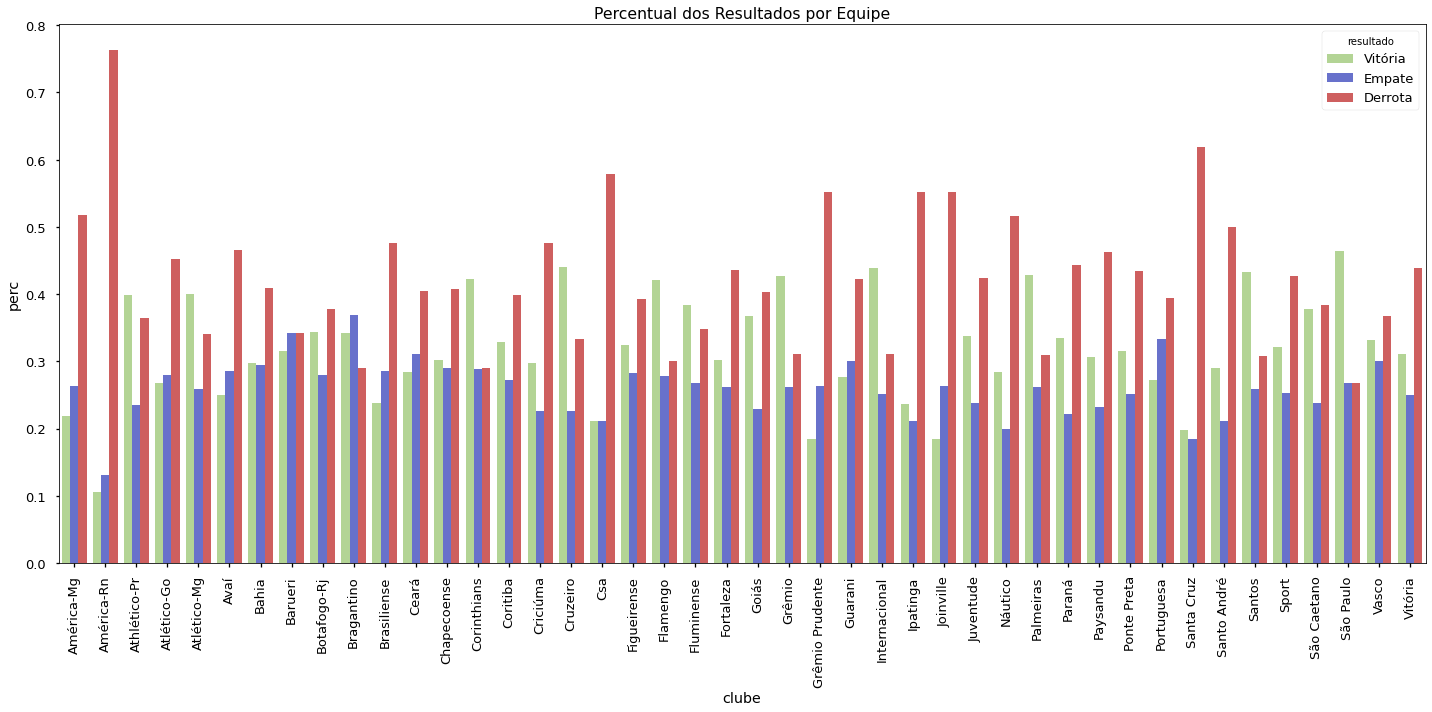

In [175]:
### gráfico percentual de resultados por equipe
percentual = resultado
perc_total = percentual.groupby(['clube'])['ocorrencia'].sum().reset_index()
percentual = pd.merge(percentual, perc_total, on='clube', suffixes=("","_y") )
 
percentual.rename(columns = {"ocorrencia_y": "perc"}, inplace=True)
percentual['perc'] = (percentual.ocorrencia / percentual.perc)

colors = ["#b2df8a", "#5764db","#e14c4c"]
sns.set_palette(sns.color_palette(colors))
 
g = sns.barplot(x="clube", y="perc", hue="resultado", data=percentual, hue_order=['Vitória','Empate','Derrota'])
 
plt.title('Percentual dos Resultados por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()

###Análise de dados
Primeiro vamos realizar análises de correlação com estes dataframes, a primeira vem de uma famosa tese do futebol: "Ataque ganha jogos mas defesa ganha campeonatos", vamos descobrir se os times que mais pontuam são os times que menos tomam gols.

In [208]:
pontos_geral=pontos_total.groupby(['clube'])['pontos_total'].sum().reset_index()
part= pontos_total.clube.value_counts()
part=part.to_frame().reset_index()
part = part.rename(columns= {0: 'list'})
part.index.name = 'index'

part.columns= ["clube","part"]



gols_sofridos_time.rename(columns  = {"time" : "clube" }, inplace=True)
a1= pontos_geral.merge(gols_sofridos_time,on="clube")
a1=a1.merge(part, on="clube")
a1['med_pontos']=a1['pontos_total']/a1['part']
a1=a1.sort_values('med_pontos',ascending=False)
corela = a1['media'].corr(a1['med_pontos'])
print(a1.head(10))
print('Correlação: ', corela)



            clube  pontos_total     media  part  med_pontos
41      São Paulo          1169  1.079545    18   64.944444
26  Internacional          1043  1.102102    17   61.352941
38         Santos          1097  1.188920    18   60.944444
13    Corinthians          1035  1.069069    17   60.882353
16       Cruzeiro          1030  1.228228    17   60.588235
19       Flamengo          1084  1.200284    18   60.222222
23         Grêmio          1022  1.098187    17   60.117647
31      Palmeiras           960  1.188710    16   60.000000
40    São Caetano           236  1.156977     4   59.000000
4     Atlético-Mg           973  1.313814    17   57.235294
Correlação:  -0.7749815239265743


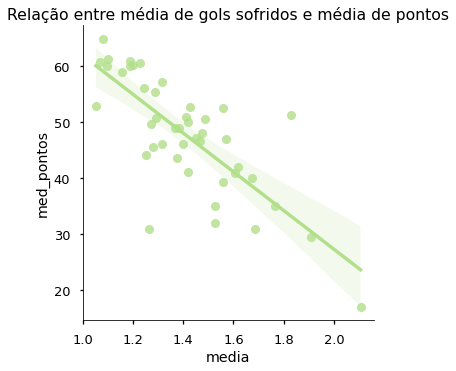

In [209]:
graf = sns.lmplot("media", "med_pontos", a1).set(title='Relação entre média de gols sofridos e média de pontos')


Vemos nesse caso uma correlação negativa(quando uma variavél aumenta a outra diminui) forte entre a pontuação média do time por edição e sua média de gols sofridos por jogo, logo, pode se dizer que quanto mais gols você toma, menos você tende a pontuar.

Fazendo uma análise inversa, podemos também análisar se os times que possuem maior numero de gols também são os que mais pontuam

In [213]:
pontos_geral=pontos_total.groupby(['clube'])['pontos_total'].sum().reset_index()
part= pontos_total.clube.value_counts()
part=part.to_frame().reset_index()
part = part.rename(columns= {0: 'list'})
part.index.name = 'index'

part.columns= ["clube","part"]



gols_marcados_time.rename(columns  = {"time" : "clube" }, inplace=True)
a1= pontos_geral.merge(gols_marcados_time,on="clube")
a1=a1.merge(part, on="clube")
a1['med_pontos']=a1['pontos_total']/a1['part']
a1['med_gols']=a1['gols marcados']/a1['part']
a1=a1.sort_values('med_pontos',ascending=False)
corela = a1['gols marcados'].corr(a1['pontos_total'])
corelam = a1['med_gols'].corr(a1['med_pontos'])

print(a1.head(10))
print('Correlação: ', corela)
print('Correlação média: ', corelam)


            clube  pontos_total  gols marcados  part  med_pontos   med_gols
41      São Paulo          1169           1037    18   64.944444  57.611111
26  Internacional          1043            893    17   61.352941  52.529412
38         Santos          1097           1060    18   60.944444  58.888889
13    Corinthians          1035            868    17   60.882353  51.058824
16       Cruzeiro          1030            978    17   60.588235  57.529412
19       Flamengo          1084            984    18   60.222222  54.666667
23         Grêmio          1022            912    17   60.117647  53.647059
31      Palmeiras           960            889    16   60.000000  55.562500
40    São Caetano           236            209     4   59.000000  52.250000
4     Atlético-Mg           973            967    17   57.235294  56.882353
Correlação:  0.9963878319944085
Correlação média:  0.8514020076374834


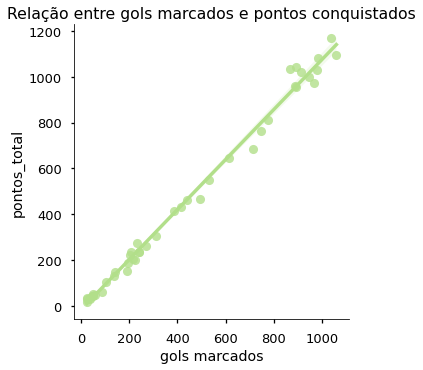

In [212]:
graf = sns.lmplot("gols marcados", "pontos_total", a1).set(title='Relação entre gols marcados e pontos conquistados')


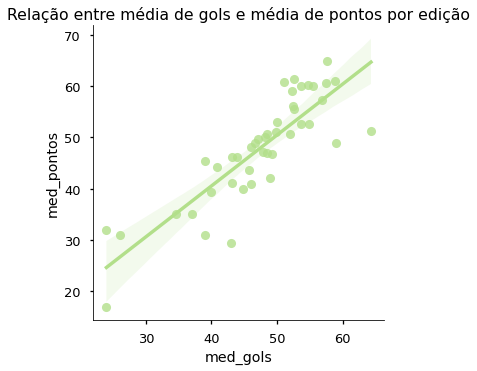

In [214]:
graf = sns.lmplot("med_gols", "med_pontos", a1).set(title='Relação entre média de gols e média de pontos por edição')


Aqui vemos uma correlação quase absoluta entre o numero total de pontos e o numero de gols marcados pela equipe na história do brasileirão em pontos corridos. Para as médias a correlação caí um pouco, mas continua válida para provar o ponto.

##Conclusão
É possivel perceber que, com os dados de resultado de futebol podemos fazer muitas analises exploratórias e possibilidades infinitas, porém é necessário um dataset com dados mais rebuscados sobre os jogos para análises mais complexas e de utilidade para os clubes e apostadores. Dados como posse de bola, cartões, numero de finalizações e de finalizações no gol podem nos dar mais informações uteis que os nossos dados não podem oferecer.